In [1]:
import numpy as np
import pandas as pd

file_path_ux = "C:/Users/Mutlu/OneDrive/Desktop/online_gaming_behavior_dataset.csv"
ux_df = pd.read_csv(file_path_ux)

ux_df.head()


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [2]:
ux_df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

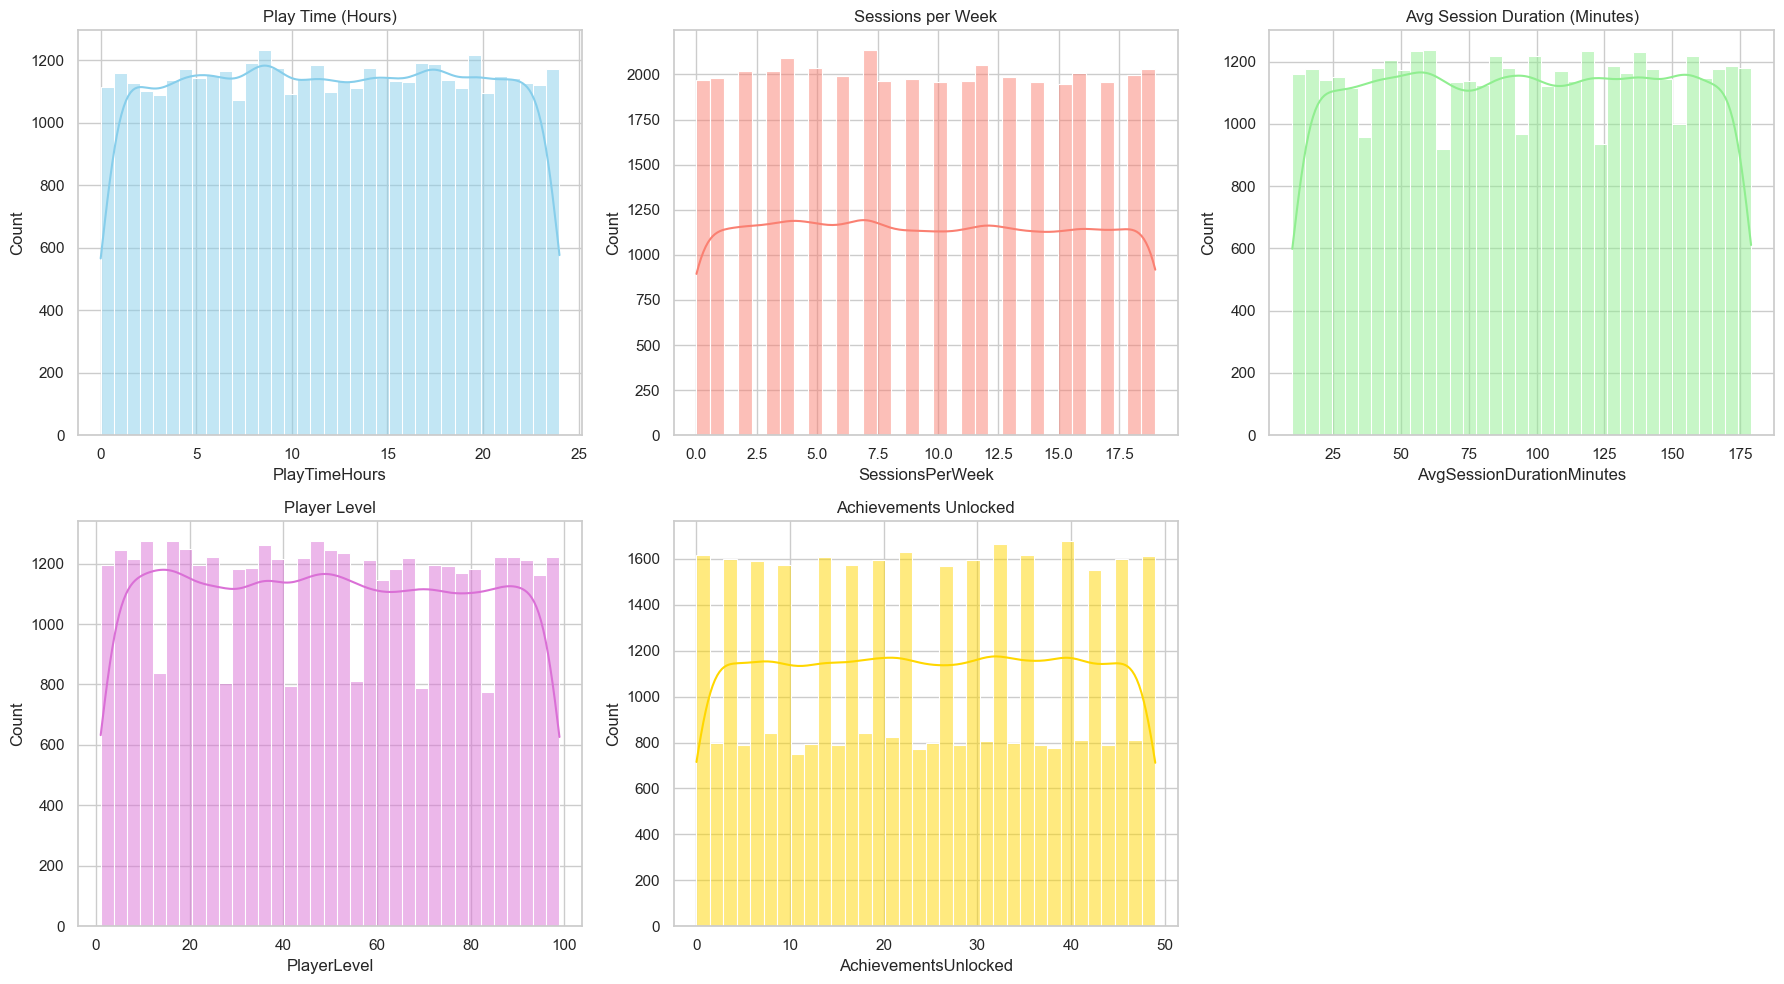

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Grafik ayarları
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# -------------------------------
# 1. OYUN ANALİZ VERİLERİYLE OYUNCU DENEYİMİNİ GELİŞTİRME
# -------------------------------
# Ortalama değerler
summary_metrics = ux_df[["PlayTimeHours", "SessionsPerWeek", "AvgSessionDurationMinutes", "PlayerLevel", "AchievementsUnlocked"]].describe()


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(ux_df["PlayTimeHours"], kde=True, ax=axs[0, 0], color="skyblue").set_title("Play Time (Hours)")
sns.histplot(ux_df["SessionsPerWeek"], kde=True, ax=axs[0, 1], color="salmon").set_title("Sessions per Week")
sns.histplot(ux_df["AvgSessionDurationMinutes"], kde=True, ax=axs[0, 2], color="lightgreen").set_title("Avg Session Duration (Minutes)")
sns.histplot(ux_df["PlayerLevel"], kde=True, ax=axs[1, 0], color="orchid").set_title("Player Level")
sns.histplot(ux_df["AchievementsUnlocked"], kde=True, ax=axs[1, 1], color="gold").set_title("Achievements Unlocked")
axs[1, 2].axis('off')  # boş hücre

plt.tight_layout()
plt.show()



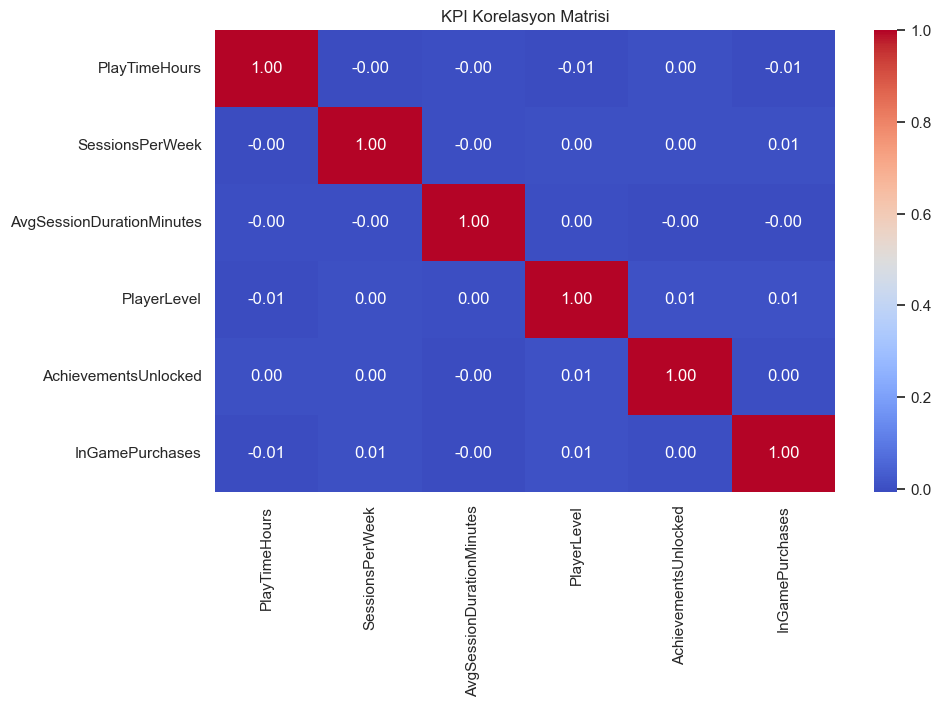

In [4]:
# -------------------------------
# 2. KPI'LARI İYİLEŞTİRME - KORELASYON ANALİZİ
# -------------------------------
# Sayısal değişkenler arasında korelasyon
correlation_matrix = ux_df[["PlayTimeHours", "SessionsPerWeek", "AvgSessionDurationMinutes", "PlayerLevel", "AchievementsUnlocked", "InGamePurchases"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("KPI Korelasyon Matrisi")
plt.show()



C:\Users\Mutlu\AppData\Local\Temp\ipykernel_20708\613596650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ux_df, x="GameDifficulty", y="PlayTimeHours", palette="Set3")


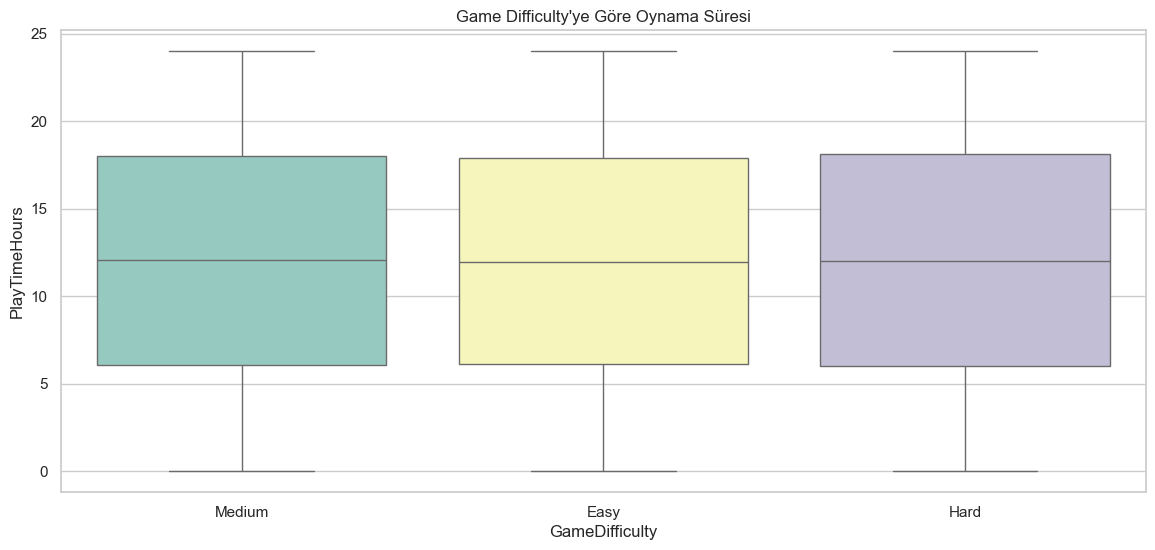

C:\Users\Mutlu\AppData\Local\Temp\ipykernel_20708\613596650.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ux_df, x="GameDifficulty", y="EngagementLevel", palette="Set2", order=["Low", "Medium", "High"])


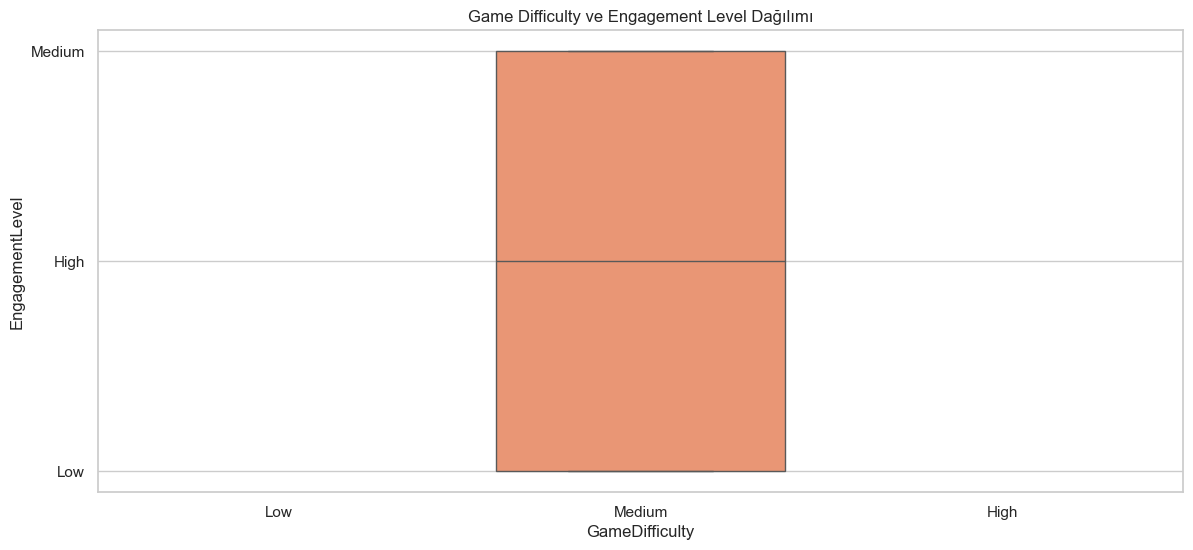

In [5]:
# -------------------------------
# 3. KULLANICI DENEYİMİ ANALİZİ - GAME DIFFICULTY İLE KARŞILAŞTIRMA
# -------------------------------
plt.figure(figsize=(14, 6))
sns.boxplot(data=ux_df, x="GameDifficulty", y="PlayTimeHours", palette="Set3")
plt.title("Game Difficulty'ye Göre Oynama Süresi")
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=ux_df, x="GameDifficulty", y="EngagementLevel", palette="Set2", order=["Low", "Medium", "High"])
plt.title("Game Difficulty ve Engagement Level Dağılımı")
plt.show()





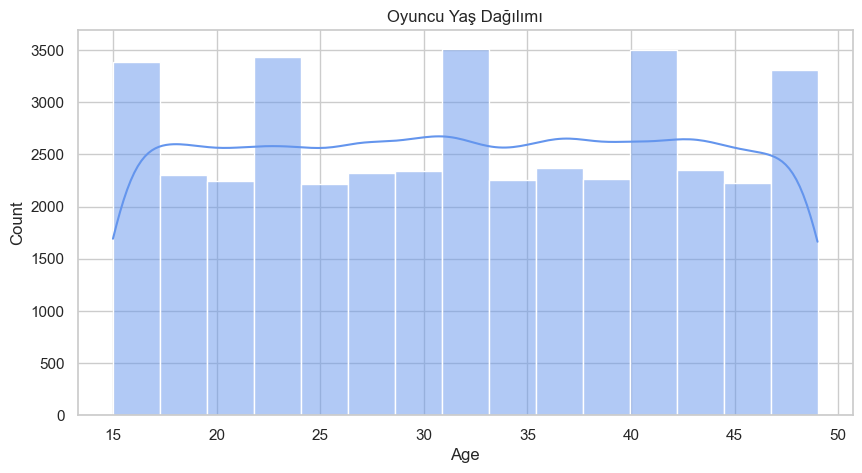

C:\Users\Mutlu\AppData\Local\Temp\ipykernel_20708\2410317704.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ux_df, x="Gender", palette="pastel")


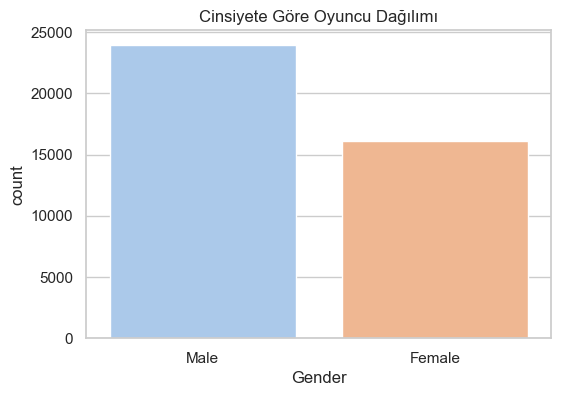

C:\Users\Mutlu\AppData\Local\Temp\ipykernel_20708\2410317704.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ux_df, x="Location", palette="muted")


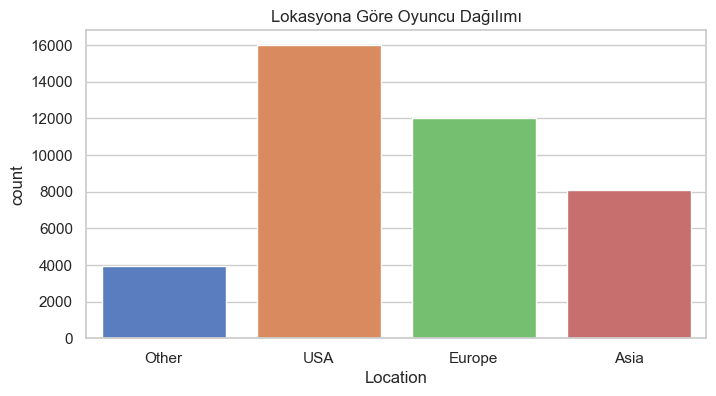

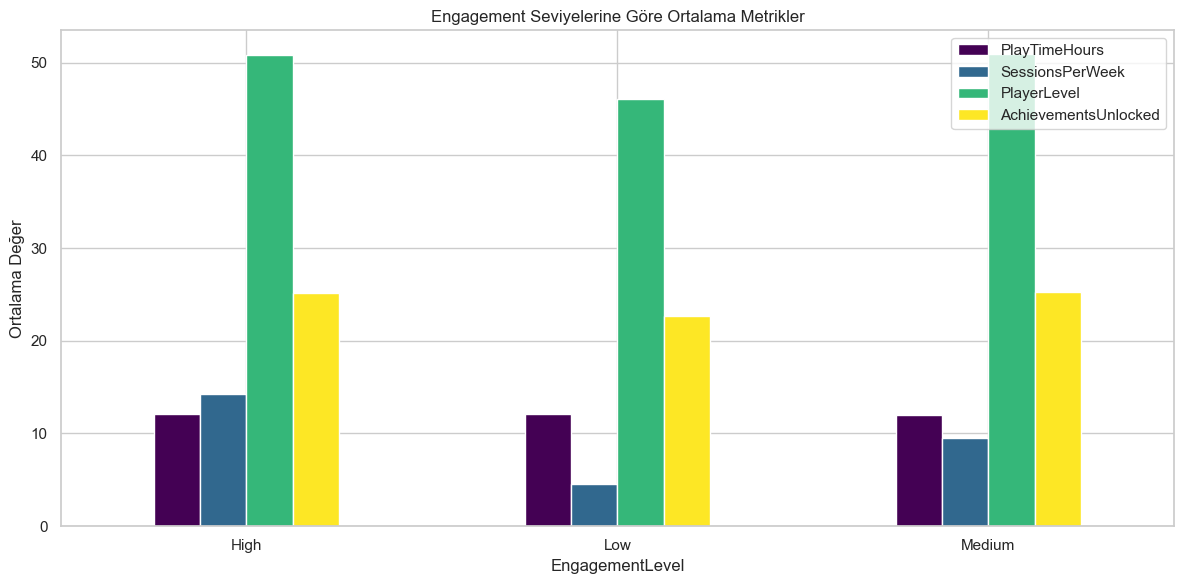

In [6]:
# -------------------------------
# 4. OYUNCU PROFİLLERİ VE SEGMENTASYON
# -------------------------------
# Yaş dağılımı
plt.figure(figsize=(10, 5))
sns.histplot(ux_df["Age"], bins=15, kde=True, color="cornflowerblue")
plt.title("Oyuncu Yaş Dağılımı")
plt.show()

# Cinsiyet dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(data=ux_df, x="Gender", palette="pastel")
plt.title("Cinsiyete Göre Oyuncu Dağılımı")
plt.show()

# Lokasyon analizi
plt.figure(figsize=(8, 4))
sns.countplot(data=ux_df, x="Location", palette="muted")
plt.title("Lokasyona Göre Oyuncu Dağılımı")
plt.show()

# Engagement Level'e göre segmentlerin ortalama değerleri
segment_means = ux_df.groupby("EngagementLevel")[["PlayTimeHours", "SessionsPerWeek", "PlayerLevel", "AchievementsUnlocked"]].mean()

segment_means.plot(kind='bar', figsize=(12, 6), colormap="viridis")
plt.title("Engagement Seviyelerine Göre Ortalama Metrikler")
plt.ylabel("Ortalama Değer")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



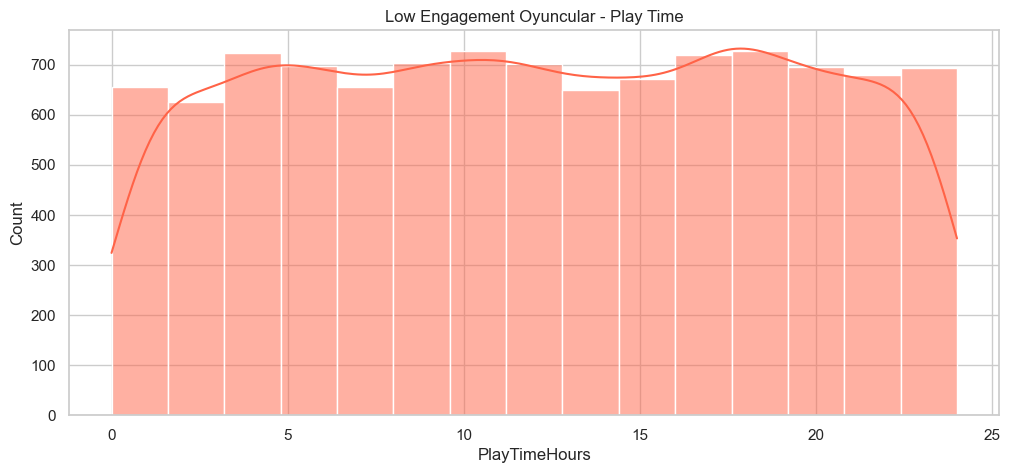

In [7]:
# -------------------------------
# 5. ÜRÜN GELİŞTİRME SÜRECİNE GERİ BİLDİRİM
# -------------------------------
# Engagement seviyesi düşük kullanıcıların profil analizi
low_engagement = ux_df[ux_df["EngagementLevel"] == "Low"]

plt.figure(figsize=(12, 5))
sns.histplot(low_engagement["PlayTimeHours"], bins=15, kde=True, color="tomato")
plt.title("Low Engagement Oyuncular - Play Time")
plt.show()




C:\Users\Mutlu\AppData\Local\Temp\ipykernel_20708\1706091804.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ux_df, x="EngagementLevel", y="PlayerLevel", order=["Low", "Medium", "High"], palette="coolwarm")


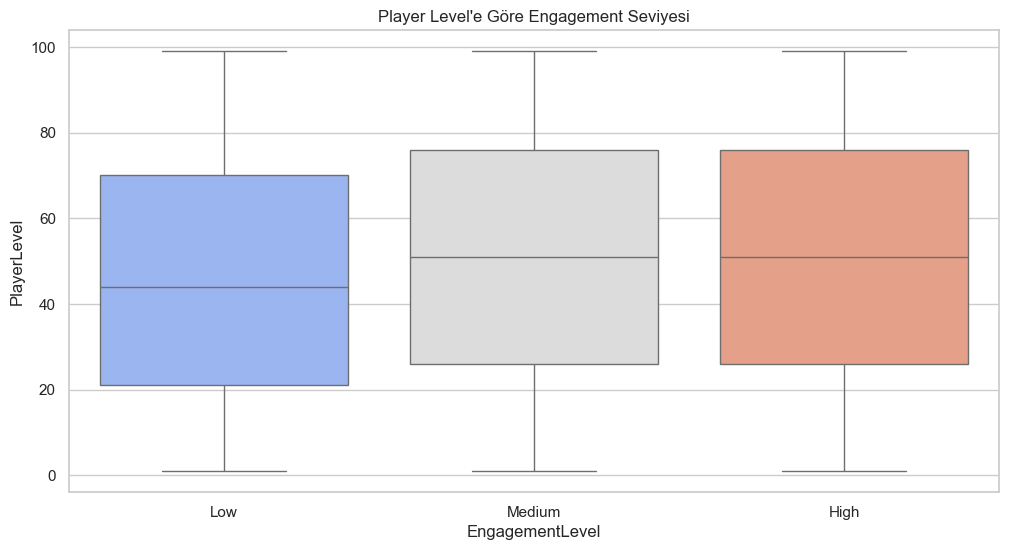

C:\Users\Mutlu\AppData\Local\Temp\ipykernel_20708\1706091804.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ux_df, x="EngagementLevel", y="AchievementsUnlocked", order=["Low", "Medium", "High"], palette="YlGnBu")


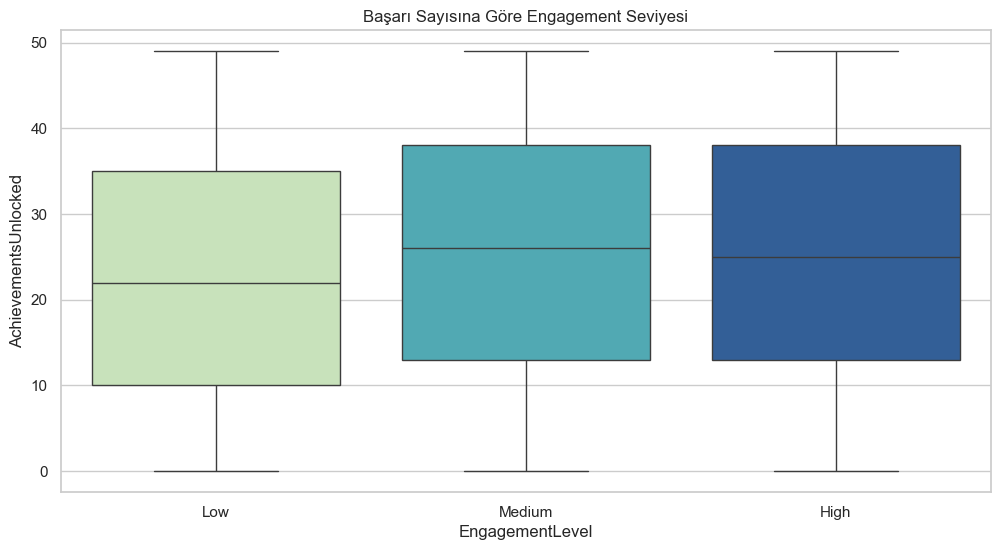

In [8]:
# -------------------------------
# 6. UX GELİŞTİRMEYE GENEL BAKIŞ - Segment Karşılaştırması
# -------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=ux_df, x="EngagementLevel", y="PlayerLevel", order=["Low", "Medium", "High"], palette="coolwarm")
plt.title("Player Level'e Göre Engagement Seviyesi")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=ux_df, x="EngagementLevel", y="AchievementsUnlocked", order=["Low", "Medium", "High"], palette="YlGnBu")
plt.title("Başarı Sayısına Göre Engagement Seviyesi")
plt.show()